Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 37 seconds.


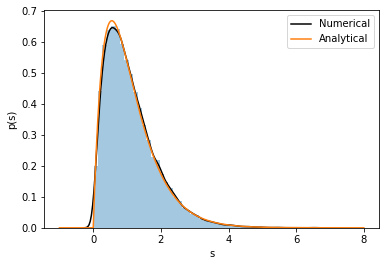

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import numpy as np
from scipy import stats

ss = np.linspace(-1,8,1000)
with pm.Model():
    s = pm.Gamma('s',alpha=1,beta=1) # s = prior
    obs = pm.Exponential('obs',lam = s,observed = 0.819) # observed = x
    trace = pm.sample(20000)
tracee = trace['s']
analytical = stats.gamma.pdf(ss,a = 2, scale = 1/1.819)
sns.distplot(tracee,kde_kws={'color':'k'})
plt.plot(ss,analytical)
plt.xlabel('s')
plt.ylabel('p(s)')
plt.legend(['Numerical','Analytical'])
plt.show()